In [82]:
#Bibliotheken 

from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt


from pypfopt import risk_models
from pypfopt import plotting
#Aktienauswahl


assets = ['DB','SAP', 'SEDG', 'TSLA','WY','UNFI','DAR','XYL','EWJ','QDVR.DE','IESE.SW']





In [83]:
assets_data = yf.download(assets, period="max")
prices = assets_data["Adj Close"]
prices.tail()




[*********************100%***********************]  11 of 11 completed


,DAR,DB,EWJ,IESE.SW,QDVR.DE,SAP,SEDG,TSLA,UNFI,WY,XYL
Date,,,,,,,,,,,
2020-12-28,56.500000,11.19,66.489998,NaN,NaN,130.910004,318.410004,663.690002,16.299999,33.709999,100.370003
2020-12-29,56.299999,10.94,67.320000,NaN,NaN,129.949997,307.970001,665.989990,15.900000,33.330002,99.510002
2020-12-30,58.880001,10.89,67.349998,NaN,NaN,130.639999,319.100006,694.780029,15.850000,33.650002,100.779999
2020-12-31,57.680000,10.90,67.559998,NaN,NaN,130.389999,319.119995,705.669983,15.970000,33.529999,101.790001
2021-01-04,56.930000,10.74,66.760002,51.57,8.703,129.240005,311.350006,729.770020,16.879999,32.810001,99.690002


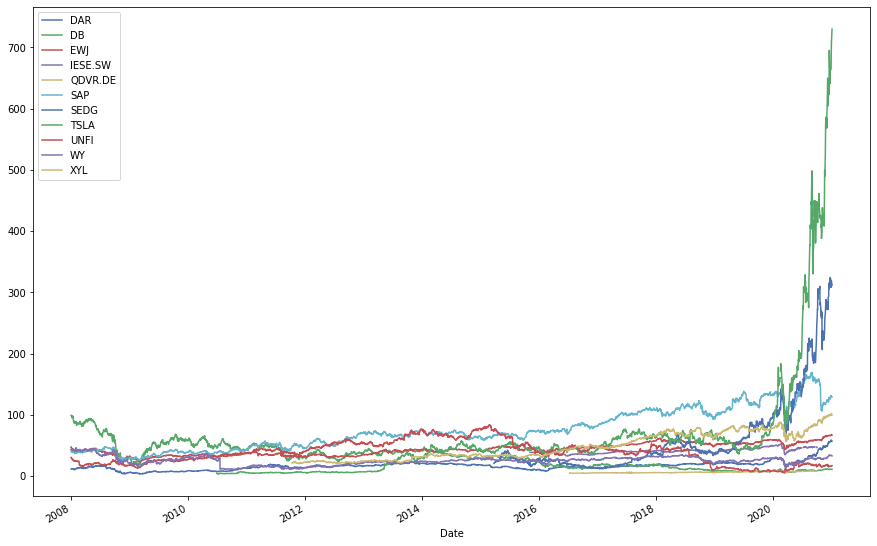

In [84]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));



    


In [85]:
asset_cov = risk_models.sample_cov(prices, frequency=252)
asset_cov



,DAR,DB,EWJ,IESE.SW,QDVR.DE,SAP,SEDG,TSLA,UNFI,WY,XYL
DAR,0.535095,0.064955,0.027213,0.008881,0.017636,0.037191,0.069549,0.047904,0.028254,0.042937,0.038850
DB,0.064955,0.187344,0.049891,0.012728,0.019901,0.073097,0.070451,0.058174,0.047842,0.070410,0.046113
EWJ,0.027213,0.049891,0.054850,0.005464,0.008964,0.038355,0.035207,0.026570,0.024285,0.034341,0.023054
IESE.SW,0.008881,0.012728,0.005464,0.020701,0.013150,0.008153,0.010819,0.011152,0.005356,0.009746,0.007221
QDVR.DE,0.017636,0.019901,0.008964,0.013150,0.105594,0.011114,0.030746,0.028947,0.003552,0.016179,0.017162
SAP,0.037191,0.073097,0.038355,0.008153,0.011114,0.160274,0.043425,0.037952,0.033131,0.043418,0.028668
SEDG,0.069549,0.070451,0.035207,0.010819,0.030746,0.043425,0.399521,0.092071,0.040156,0.074241,0.048294
TSLA,0.047904,0.058174,0.026570,0.011152,0.028947,0.037952,0.092071,0.313720,0.025397,0.052452,0.036580
UNFI,0.028254,0.047842,0.024285,0.005356,0.003552,0.033131,0.040156,0.025397,0.245565,0.032733,0.021961
WY,0.042937,0.070410,0.034341,0.009746,0.016179,0.043418,0.074241,0.052452,0.032733,0.111187,0.044253


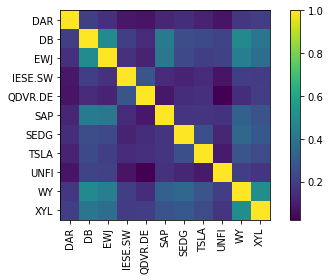

In [86]:
plotting.plot_covariance(asset_cov, plot_correlation=True);






In [87]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

DAR        0.185279
DB         0.126667
EWJ        0.070139
IESE.SW    0.033868
QDVR.DE    0.053779
SAP        0.105141
SEDG       0.136566
TSLA       0.117640
UNFI       0.102550
WY         0.117828
XYL        0.068188
Name: mkt, dtype: float64

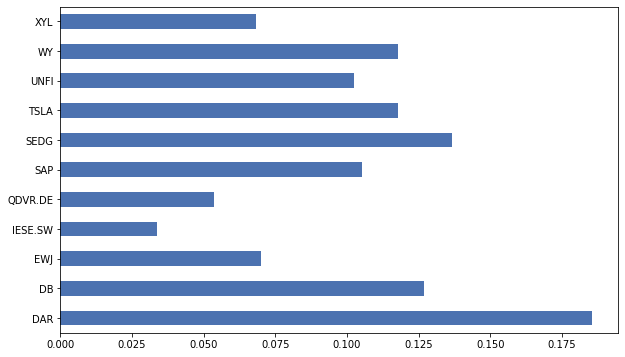

In [88]:
mu.plot.barh(figsize=(10,6));


In [96]:
from pypfopt import EfficientFrontier

ef = EfficientFrontier(mu, asset_cov)
ef.efficient_risk(target_volatility=0.23)
weights = ef.clean_weights()
weights






OrderedDict([('DAR', 0.12072),
             ('DB', 0.05387),
             ('EWJ', 0.08434),
             ('IESE.SW', 0.08329),
             ('QDVR.DE', 0.07052),
             ('SAP', 0.1169),
             ('SEDG', 0.04009),
             ('TSLA', 0.06117),
             ('UNFI', 0.10136),
             ('WY', 0.26773),
             ('XYL', 0.0)])

In [97]:
ef.portfolio_performance(verbose=True);


Expected annual return: 10.9%
Annual volatility: 23.0%
Sharpe Ratio: 0.39


In [98]:
from pypfopt import CLA, plotting

cla = CLA(mu, asset_cov)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 8.5%
Annual volatility: 17.6%
Sharpe Ratio: 0.37


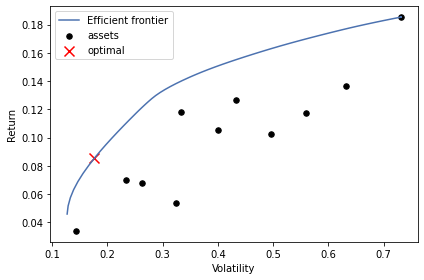

In [99]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)


/opt/anaconda3/envs/cvxpy/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1600: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


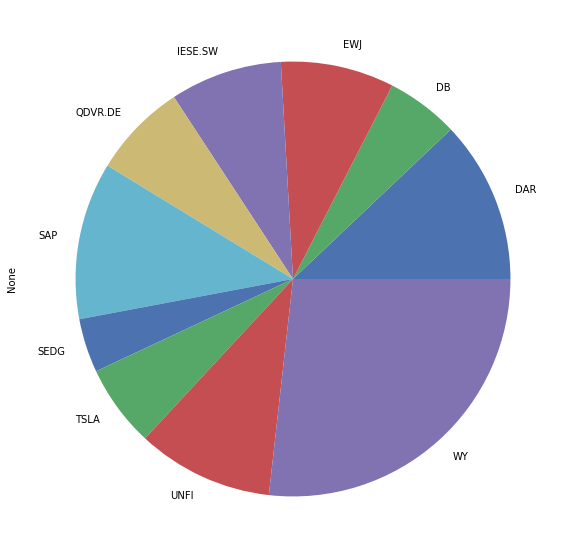

In [100]:
pd.Series(weights).plot.pie(figsize=(10, 10));

